# Filter posts on the reddit related to the ***Climate change***

python=3.7

In [1]:
import pandas as pd
from joblib import Parallel, delayed  # parallel computing
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# show all columns in the DataFrame
pd.set_option('display.max_columns', None)
# fully display the content in displayed table cells
pd.set_option('display.max_colwidth', None)

## Use keywords to select comments related to ***climatechange***

In [ ]:
# Filtering using topic keywords
import os
import re
from datetime import datetime
import pandas as pd
from multiprocessing import Pool

# keywords
keywords = ["climate change", "climate science", "climate manipulation", "climate Engineering", "Climate Hacking", 
            "climate modification", "climate science", "Global Warming", "carbon footprint", "The Paris Agreement"]

# file path
source_path = "/mnt/data/reddit/reddit/RC/"
target_path = "data/csv_filtered/"

# set time range
start_date = datetime.strptime("2020-09", "%Y-%m")
end_date = datetime.strptime("2020-01", "%Y-%m")

# settings for result filename
label = 'en+climate change'
content = 'comment'

# format of source filename
date_str_pattern = r'RC_(.*?)\.zst\.csv'

# other settings
chunksize = 1e6
proc_num = 13

def process_file(source_name):
    # check file name
    mtch = re.search(date_str_pattern, source_name)
    if mtch:
        # get date from file name
        date_str = mtch.group(1)
        file_date = datetime.strptime(date_str, '%Y-%m')
        
        # check if the date in time range. if yes, process the file.
        if start_date <= file_date <= end_date:
            print(f"processing {source_name} ... ...\n", end='')
            target_name = f"{content}[{label}][{date_str}].csv"

            # check if the target file already exists
            if os.path.exists(target_path + target_name):
                print(f"{target_name} already exists.\n", end='')
                return

            try:
                for chunk in pd.read_csv(source_path + source_name, chunksize=chunksize, engine='python'):
                    df = chunk[chunk['body'].astype(str).str.contains('|'.join(keywords), case=False)]
                    df.to_csv(target_path + target_name, mode='a', index=False)
                print(f"{source_name} processed.\n", end='')
            except Exception as e:
                print(f"failed processing {source_name}.\n{e}\n", end='')

# get a list of files
files = os.listdir(source_path)

# create a pool of workers
with Pool(processes=proc_num) as pool:
    pool.map(process_file, files)



print("Done.")

In [ ]:
import os

folder_path = 'data/csv_filtered'
all_data = pd.DataFrame()

# os.listdir() check the file cotaining the name
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        print(file_path)
        df = pd.read_csv(file_path, engine='python')
        all_data = all_data.append(df, ignore_index=True)

all_data.info()

data/csv_filtered/comment[en+climatechange][2020-09].csv
data/csv_filtered/comment[en+climatechange][2019-03].csv
data/csv_filtered/comment[en+climatechange][2022-05].csv
data/csv_filtered/comment[en+climatechange][2015-04].csv
data/csv_filtered/comment[en+climatechange][2014-05].csv
data/csv_filtered/comment[en+climatechange][2017-10].csv
data/csv_filtered/comment[en+climatechange][2014-08].csv
data/csv_filtered/comment[en+climatechange][2018-06].csv
data/csv_filtered/comment[en+climatechange][2019-08].csv
data/csv_filtered/comment[en+climatechange][2021-09].csv
data/csv_filtered/comment[en+climatechange][2019-10].csv
data/csv_filtered/comment[en+climatechange][2016-02].csv
data/csv_filtered/comment[en+climatechange][2020-02].csv
data/csv_filtered/comment[en+climatechange][2015-05].csv
data/csv_filtered/comment[en+climatechange][2015-12].csv
data/csv_filtered/comment[en+climatechange][2022-04].csv
data/csv_filtered/comment[en+climatechange][2019-06].csv
data/csv_filtered/comment[en+cl

In [3]:
# considering four possibilities
df=all_data.query("author !='[deleted]' & body!='[deleted]'")
df=all_data.query("author !='[removed]' & body!='[deleted]'")
df=all_data.query("author !='[removed]' & body!='[removed]'")
df=all_data.query("author !='[deleted]' & body!='[removed]'")
len(df)

5768822

In [4]:
# considering four possibilities
df=all_data.query("author !='[deleted]' & body!='[deleted]'")
df=df.query("author !='[removed]' & body!='[deleted]'")
df=df.query("author !='[removed]' & body!='[removed]'")
df=df.query("author !='[deleted]' & body!='[removed]'")
len(df)

5768822

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5768822 entries, 0 to 5916745
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   created_utc   object
 1   author        object
 2   subreddit     object
 3   body          object
 4   parent_id     object
 5   subreddit_id  object
 6   id            object
 7   lang          object
dtypes: object(8)
memory usage: 396.1+ MB


In [5]:
comment_user_list = df[['parent_id']]
comment_user_list['id'] = comment_user_list['parent_id'].str.replace('^t\d+_', '')
comment_user_list.head(5)

,parent_id,id
0,t3_ijyh52,ijyh52
1,t3_ijvrh3,ijvrh3
2,t1_g3j2del,g3j2del
3,t1_g3irl2x,g3irl2x
4,t1_g3j5mvx,g3j5mvx


In [ ]:
# first class comments
first_com = df[df['id'].isin(comment_user_list['id'].to_list())]
first_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818296 entries, 64 to 5916745
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_utc   818285 non-null  object
 1   author        818237 non-null  object
 2   subreddit     818237 non-null  object
 3   body          818231 non-null  object
 4   parent_id     818009 non-null  object
 5   subreddit_id  818009 non-null  object
 6   id            818009 non-null  object
 7   lang          22920 non-null   object
dtypes: object(8)
memory usage: 56.2+ MB


In [ ]:
# second class comment
second_com_user = comment_user_list[comment_user_list['id'].isin(first_com['id'].to_list())]

second_com = df[df['parent_id'].isin(second_com_user['parent_id'].to_list())]
second_com.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239172 entries, 2020-09-01 to 2019-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    239172 non-null  int64         
 1   created_utc   239172 non-null  datetime64[ns]
 2   author        239172 non-null  object        
 3   subreddit     239172 non-null  object        
 4   body          239172 non-null  object        
 5   parent_id     239172 non-null  object        
 6   subreddit_id  239172 non-null  object        
 7   id            239172 non-null  object        
 8   lang          6222 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 18.2+ MB


In [7]:
first_com.to_csv("data/1st_Reddit_comments[topic=climatechange][time:2014-2022][lang=en].csv")

In [25]:
first_com = pd.read_csv("data/1st_Reddit_comments[topic=climatechange][time:2014-2022][lang=en].csv")
first_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818296 entries, 0 to 818295
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    818296 non-null  int64 
 1   created_utc   818285 non-null  object
 2   author        818237 non-null  object
 3   subreddit     818237 non-null  object
 4   body          818231 non-null  object
 5   parent_id     818009 non-null  object
 6   subreddit_id  818009 non-null  object
 7   id            818009 non-null  object
 8   lang          22920 non-null   object
dtypes: int64(1), object(8)
memory usage: 56.2+ MB


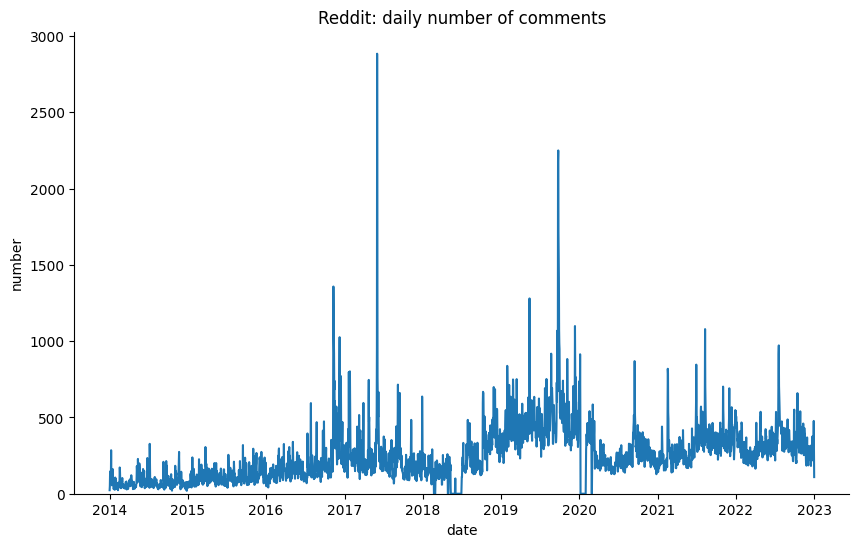

In [ ]:
# 作出按日变化的帖子数统计图
#df = pd.read_csv("data/debunking_comments[topic=POTUS2020][lang=en].csv")
df = first_com
df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')
#df['date'] = pd.to_datetime(df['created_utc'], errors='coerce') # 创建一个新列，只包含日期信息

# check NaT values
if df['created_utc'].isna().any():
    print("Warning: Some values in 'created_utc' could not be converted. They will be dropped.")

df = df.dropna(subset=['created_utc'])
# get date
df['date'] = df['created_utc'].dt.date

# set a date range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
# caculate daily commments number
daily_counts = df.groupby('date').size()  
daily_counts = daily_counts.reindex(date_range, fill_value=0)

plt.figure(figsize=(10, 6))

sns.lineplot(data=daily_counts)

ax=plt.gca()  #gca:get current axis

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('Reddit: daily number of comments')
plt.ylim((0,None))
plt.xlabel('date')
plt.ylabel('number')
plt.savefig("pic/Reddit[climatechange]daily_number_of_comments.png", dpi=300)
plt.show()

In [ ]:
# isobaric sampling
import numpy as np
df['date'] = pd.to_datetime(df['date'])
data = df
data.set_index('date', inplace=True)
sampled_data = pd.DataFrame()

#  Grouped and sampled according to each month
for name, group in data.groupby(pd.Grouper(freq='M')):
    if len(group) >= 100: 
        sampled = group.sample(n=100, random_state=1) 
        sampled_data = pd.concat([sampled_data, sampled])
    else:
        print(f"警告：{name.strftime('%Y-%m')} 的数据不足84条, 跳过此月份。") # There are less than 84 entries in this range, skip this month.

sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10900 entries, 2014-01-08 to 2023-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    10900 non-null  int64         
 1   created_utc   10900 non-null  datetime64[ns]
 2   author        10900 non-null  object        
 3   subreddit     10900 non-null  object        
 4   body          10900 non-null  object        
 5   parent_id     10897 non-null  object        
 6   subreddit_id  10897 non-null  object        
 7   id            10897 non-null  object        
 8   lang          290 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 851.6+ KB


In [5]:
df.to_csv("data/Reddit_fulldata_comments[topic=climatechange][time:2014-2022][lang=en].csv", index=False)

In [29]:
sampled_data.to_csv("data/Reddit_comments[1st_class][count:10900][topic=climatechange][time:2014-2022][lang=en].csv", index=False)